<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/Rough%20Work/MS_knn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import holidays
import matplotlib.pyplot as plt

dataset = pd.read_csv("https://github.com/Jenarth/SCS3250-Group-2-Final-Project/raw/master/Final%20Dataset.csv")

In [2]:
#create bins for union ridership
ridership_bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000] #try with smaller bins
ridership_labels = ['0 to 10000','10000 to 20000','20000 to 30000','30000 to 40000','40000 to 50000','50000 to 60000','60000 to 70000','70000 to 80000','80000 to 90000','90000 to 100000','100000 to 110000','110000 to 120000','120000 to 130000','130000 to 140000','140000 to 150000','150000 to 160000']
dataset['Union Station Ridership Ranges'] = pd.cut(dataset['Union Station Ridership'], bins=ridership_bins, labels=ridership_labels)
dataset.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below,Union Station Ridership Ranges
0,2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451,90000 to 100000
1,2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508,90000 to 100000
2,2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490,80000 to 90000
3,2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198,10000 to 20000
4,2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488,0 to 10000


Text(0, 0.5, 'Frequency')

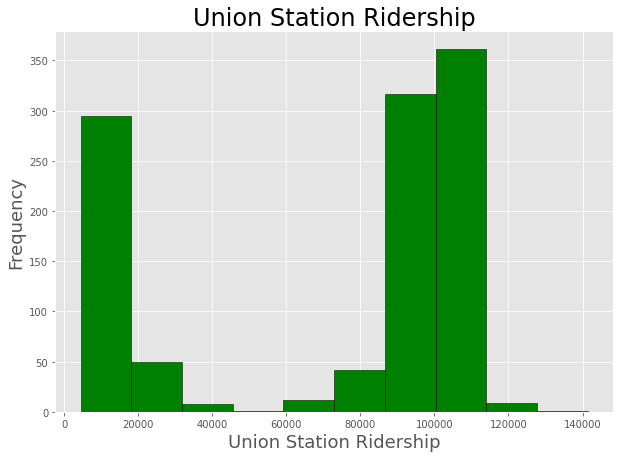

In [3]:
plt.style.use('ggplot')

dataset["Union Station Ridership"].plot(kind='hist', color='green', edgecolor='black', figsize=(10,7))
plt.title('Union Station Ridership', size=24)
plt.xlabel('Union Station Ridership', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

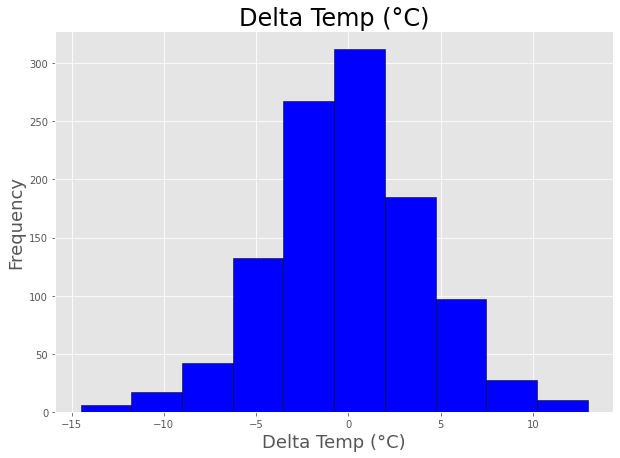

In [4]:
dataset["Delta Temp (°C)"].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Delta Temp (°C)', size=24)
plt.xlabel('Delta Temp (°C)', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

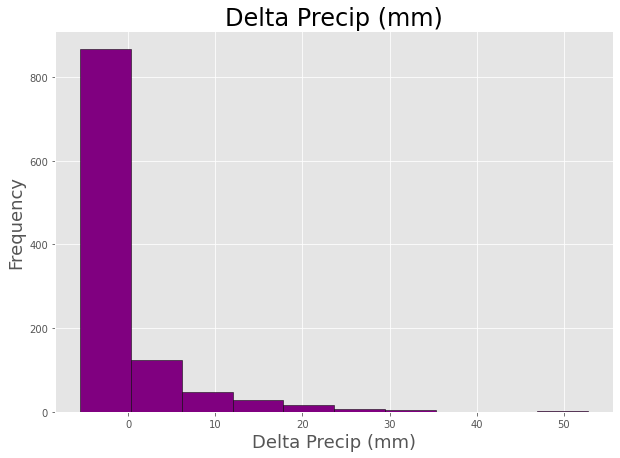

In [5]:
dataset["Delta Precip (mm)"].plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Delta Precip (mm)', size=24)
plt.xlabel('Delta Precip (mm)', size=18)
plt.ylabel('Frequency', size=18)

In [6]:
#change weekdays to numbers

def CategorizeByWeekday(x):
    if x['Weekday']=='Sunday':
      val = 1
    elif x['Weekday']=='Monday':
      val = 2
    elif x['Weekday']=='Tuesday':
      val = 3
    elif x['Weekday']=='Wednesday':
      val = 4
    elif x['Weekday']=='Thursday':
      val = 5
    elif x['Weekday']=='Friday':
      val = 6
    elif x['Weekday']=='Saturday':
      val = 7            
    else:
      val = "None"
    return val

dataset["Weekday"] = dataset.apply(CategorizeByWeekday, axis = 1)

dataset

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below,Union Station Ridership Ranges
0,2017-03-01,2017,3,2017-03,1,4,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451,90000 to 100000
1,2017-03-02,2017,3,2017-03,2,5,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508,90000 to 100000
2,2017-03-03,2017,3,2017-03,3,6,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490,80000 to 90000
3,2017-03-04,2017,3,2017-03,4,7,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198,10000 to 20000
4,2017-03-05,2017,3,2017-03,5,1,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488,0 to 10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2020-02-25,2020,2,2020-02,25,3,False,5.6,1.7,3.7,-1.906897,5.606897,0.2,2.137931,-1.937931,0.0,13650,15097,29727,36973,17192,6865,10485,99431,229420,False,226142.086667,260553.155725,191731.017608,90000 to 100000
1092,2020-02-26,2020,2,2020-02,26,4,False,4.1,-3.2,0.4,-1.906897,2.306897,11.8,2.137931,9.662069,0.0,12596,13557,26690,33732,14331,6215,9749,98193,215063,False,227296.503311,254365.810172,200227.196451,90000 to 100000
1093,2020-02-27,2020,2,2020-02,27,5,False,-2.7,-5.3,-4.0,-1.906897,-2.093103,3.1,2.137931,0.962069,0.0,11349,13074,26818,34180,15281,5522,9151,94998,210373,False,224966.615894,253295.696280,196637.535508,90000 to 100000
1094,2020-02-28,2020,2,2020-02,28,6,False,-2.5,-9.4,-5.9,-1.906897,-3.993103,1.1,2.137931,-1.037931,0.0,11098,13008,27785,34263,14426,5629,8759,95108,210076,False,204211.905405,232457.905320,175965.905490,90000 to 100000


In [0]:
#only keep values without outliers/holidays
dataset_noOutliers  = dataset.loc[dataset["Holiday"]==False]

In [8]:
#create dataset for knn
knn_dataset = dataset_noOutliers[["Date","Month","Weekday","Delta Temp (°C)","Delta Precip (mm)","Union Station Ridership Ranges"]].copy()
knn_dataset

,Date,Month,Weekday,Delta Temp (°C),Delta Precip (mm),Union Station Ridership Ranges
0,2017-03-01,3,4,5.851613,16.064516,90000 to 100000
1,2017-03-02,3,5,-3.648387,-2.135484,90000 to 100000
2,2017-03-03,3,6,-5.948387,-2.335484,80000 to 90000
3,2017-03-04,3,7,-8.948387,-2.135484,10000 to 20000
4,2017-03-05,3,1,-5.248387,-2.335484,0 to 10000
...,...,...,...,...,...,...
1091,2020-02-25,2,3,5.606897,-1.937931,90000 to 100000
1092,2020-02-26,2,4,2.306897,9.662069,90000 to 100000
1093,2020-02-27,2,5,-2.093103,0.962069,90000 to 100000
1094,2020-02-28,2,6,-3.993103,-1.037931,90000 to 100000


In [9]:
#convert ridership to category
knn_dataset["Union Station Ridership Ranges"] = knn_dataset["Union Station Ridership Ranges"].astype('category')
knn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Date                            1064 non-null   object  
 1   Month                           1064 non-null   int64   
 2   Weekday                         1064 non-null   int64   
 3   Delta Temp (°C)                 1064 non-null   float64 
 4   Delta Precip (mm)               1064 non-null   float64 
 5   Union Station Ridership Ranges  1064 non-null   category
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 51.7+ KB


### knn predict for June 2019

In [10]:
X = knn_dataset[["Date","Month","Weekday","Delta Temp (°C)","Delta Precip (mm)"]]
X.shape

(1064, 5)

In [11]:
#X.iloc[1:] = X.iloc[1:].astype(float)
cols = ['Month', 'Weekday', 'Delta Temp (°C)', 'Delta Precip (mm)']
for col in cols:
   X[col] = X[col].apply(lambda x: float(x) if x == x else "")
X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Month,Weekday,Delta Temp (°C),Delta Precip (mm)
0,2017-03-01,3.0,4.0,5.851613,16.064516
1,2017-03-02,3.0,5.0,-3.648387,-2.135484
2,2017-03-03,3.0,6.0,-5.948387,-2.335484
3,2017-03-04,3.0,7.0,-8.948387,-2.135484
4,2017-03-05,3.0,1.0,-5.248387,-2.335484
...,...,...,...,...,...
1091,2020-02-25,2.0,3.0,5.606897,-1.937931
1092,2020-02-26,2.0,4.0,2.306897,9.662069
1093,2020-02-27,2.0,5.0,-2.093103,0.962069
1094,2020-02-28,2.0,6.0,-3.993103,-1.037931


In [12]:
y = knn_dataset["Union Station Ridership Ranges"]
y.shape

(1064,)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#use June 2019 as test data

X_train_1 = X.loc[(X['Date']>"2017-03-01") & (X['Date']<"2019-06-01")]
X_train_2 = X.loc[(X['Date']>"2019-06-30") & (X['Date']<"2020-03-01")]
X_train = pd.concat([X_train_1, X_train_2], ignore_index=True, sort =False)
X_train.drop('Date', axis=1, inplace=True)
X_train

,Month,Weekday,Delta Temp (°C),Delta Precip (mm)
0,3.0,5.0,-3.648387,-2.135484
1,3.0,6.0,-5.948387,-2.335484
2,3.0,7.0,-8.948387,-2.135484
3,3.0,1.0,-5.248387,-2.335484
4,3.0,2.0,-9.548387,-2.335484
...,...,...,...,...
1028,2.0,3.0,5.606897,-1.937931
1029,2.0,4.0,2.306897,9.662069
1030,2.0,5.0,-2.093103,0.962069
1031,2.0,6.0,-3.993103,-1.037931


In [14]:
X_test = X.loc[(X['Date']>"2019-05-31") & (X['Date']<"2019-07-01")]
X_test.drop('Date', axis=1, inplace=True)
X_test.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(30, 4)

In [15]:
y_train_1 = y.loc[(X['Date']>"2017-03-01") & (X['Date']<"2019-06-01")]
y_train_2 = y.loc[(X['Date']>"2019-06-30") & (X['Date']<"2020-03-01")]
y_train = pd.concat([y_train_1, y_train_2], ignore_index=True, sort =False)
y_train.shape

(1033,)

In [16]:
y_test = y.loc[(X['Date']>"2019-05-31") & (X['Date']<"2019-07-01")]
y_test.shape

(30,)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
y_hat

array(['10000 to 20000', '10000 to 20000', '100000 to 110000',
       '100000 to 110000', '80000 to 90000', '90000 to 100000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000', '0 to 10000',
       '100000 to 110000', '90000 to 100000', '90000 to 100000',
       '90000 to 100000', '10000 to 20000', '10000 to 20000',
       '100000 to 110000', '100000 to 110000', '100000 to 110000',
       '100000 to 110000', '80000 to 90000', '10000 to 20000',
       '0 to 10000', '100000 to 110000', '100000 to 110000',
       '100000 to 110000', '90000 to 100000', '100000 to 110000',
       '10000 to 20000', '10000 to 20000'], dtype=object)

In [18]:
y_test

822      10000 to 20000
823      10000 to 20000
824    100000 to 110000
825    100000 to 110000
826    100000 to 110000
827    100000 to 110000
828     90000 to 100000
829      10000 to 20000
830      10000 to 20000
831    100000 to 110000
832    100000 to 110000
833    100000 to 110000
834    100000 to 110000
835     90000 to 100000
836      10000 to 20000
837      10000 to 20000
838    140000 to 150000
839    100000 to 110000
840    100000 to 110000
841    100000 to 110000
842     90000 to 100000
843      10000 to 20000
844      10000 to 20000
845    100000 to 110000
846    100000 to 110000
847    100000 to 110000
848    100000 to 110000
849      80000 to 90000
850      10000 to 20000
851      10000 to 20000
Name: Union Station Ridership Ranges, dtype: category
Categories (16, object): [0 to 10000 < 10000 to 20000 < 20000 to 30000 < 30000 to 40000 < ... <
                          120000 to 130000 < 130000 to 140000 < 140000 to 150000 < 150000 to 160000]

In [19]:
accuracy_score(y_test,y_hat)

0.6333333333333333

In [20]:
neighbors = range(1,100)
error = []
score = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_hat))
y_hat

array(['90000 to 100000', '100000 to 110000', '100000 to 110000',
       '100000 to 110000', '90000 to 100000', '100000 to 110000',
       '100000 to 110000', '90000 to 100000', '90000 to 100000',
       '100000 to 110000', '100000 to 110000', '100000 to 110000',
       '100000 to 110000', '90000 to 100000', '90000 to 100000',
       '100000 to 110000', '100000 to 110000', '100000 to 110000',
       '90000 to 100000', '100000 to 110000', '100000 to 110000',
       '10000 to 20000', '100000 to 110000', '100000 to 110000',
       '100000 to 110000', '90000 to 100000', '90000 to 100000',
       '100000 to 110000', '90000 to 100000', '90000 to 100000'],
      dtype=object)

Text(0, 0.5, 'Accuracy Score')

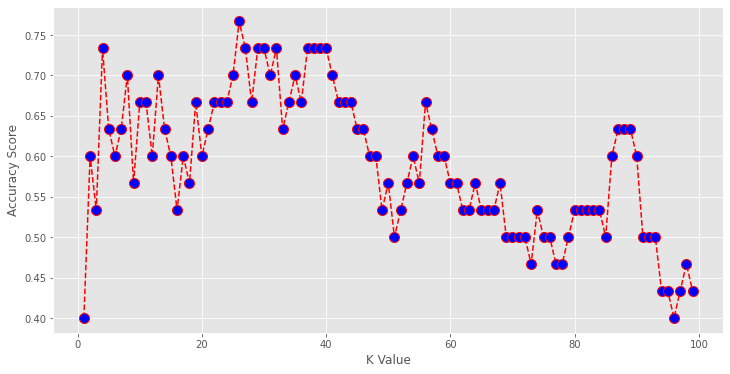

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(neighbors, score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

In [22]:
knn = KNeighborsClassifier(n_neighbors=51) #best score
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
score = accuracy_score(y_test, y_hat)
score

0.5

In [23]:
dataset.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below,Union Station Ridership Ranges
0,2017-03-01,2017,3,2017-03,1,4,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451,90000 to 100000
1,2017-03-02,2017,3,2017-03,2,5,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508,90000 to 100000
2,2017-03-03,2017,3,2017-03,3,6,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490,80000 to 90000
3,2017-03-04,2017,3,2017-03,4,7,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198,10000 to 20000
4,2017-03-05,2017,3,2017-03,5,1,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488,0 to 10000


### knn predict for Mondays

In [24]:
knn_dataset = dataset[["Date","Month","Weekday","Delta Temp (°C)","Delta Precip (mm)","Union Station Ridership Ranges"]].copy()
knn_dataset.head()

,Date,Month,Weekday,Delta Temp (°C),Delta Precip (mm),Union Station Ridership Ranges
0,2017-03-01,3,4,5.851613,16.064516,90000 to 100000
1,2017-03-02,3,5,-3.648387,-2.135484,90000 to 100000
2,2017-03-03,3,6,-5.948387,-2.335484,80000 to 90000
3,2017-03-04,3,7,-8.948387,-2.135484,10000 to 20000
4,2017-03-05,3,1,-5.248387,-2.335484,0 to 10000


In [25]:
knn_dataset_M = knn_dataset.loc[knn_dataset["Weekday"]==1]
knn_dataset_M.head()

,Date,Month,Weekday,Delta Temp (°C),Delta Precip (mm),Union Station Ridership Ranges
4,2017-03-05,3,1,-5.248387,-2.335484,0 to 10000
11,2017-03-12,3,1,-7.948387,-2.335484,0 to 10000
18,2017-03-19,3,1,3.651613,-2.335484,10000 to 20000
25,2017-03-26,3,1,4.151613,0.064516,0 to 10000
32,2017-04-02,4,1,0.963333,-3.586667,0 to 10000


In [26]:
knn_dataset_M["Union Station Ridership Ranges"] = knn_dataset_M["Union Station Ridership Ranges"].astype('category')
knn_dataset_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 4 to 1089
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Date                            156 non-null    object  
 1   Month                           156 non-null    int64   
 2   Weekday                         156 non-null    int64   
 3   Delta Temp (°C)                 156 non-null    float64 
 4   Delta Precip (mm)               156 non-null    float64 
 5   Union Station Ridership Ranges  156 non-null    category
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 8.2+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
X = knn_dataset_M[["Month","Weekday","Delta Temp (°C)","Delta Precip (mm)"]]
X.shape

(156, 4)

In [28]:
#X.iloc[1:] = X.iloc[1:].astype(float)
cols = ['Month', 'Weekday', 'Delta Temp (°C)', 'Delta Precip (mm)']
for col in cols:
   X[col] = X[col].apply(lambda x: float(x) if x == x else "")
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 4 to 1089
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              156 non-null    float64
 1   Weekday            156 non-null    float64
 2   Delta Temp (°C)    156 non-null    float64
 3   Delta Precip (mm)  156 non-null    float64
dtypes: float64(4)
memory usage: 6.1 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
y = knn_dataset_M["Union Station Ridership Ranges"]
y.shape

(156,)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
X_train.shape

(124, 4)

In [31]:
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
y_hat

array(['10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000'], dtype=object)

In [32]:
y_test

802     10000 to 20000
361         0 to 10000
536     10000 to 20000
935         0 to 10000
508     10000 to 20000
760     10000 to 20000
858     10000 to 20000
151     10000 to 20000
606         0 to 10000
88      10000 to 20000
991     10000 to 20000
627     10000 to 20000
669     10000 to 20000
249     10000 to 20000
200         0 to 10000
641         0 to 10000
95      10000 to 20000
452     10000 to 20000
865     10000 to 20000
949     10000 to 20000
956     10000 to 20000
725     10000 to 20000
809     10000 to 20000
144         0 to 10000
1068        0 to 10000
592         0 to 10000
718     10000 to 20000
242         0 to 10000
683         0 to 10000
613     10000 to 20000
1089    10000 to 20000
648     10000 to 20000
Name: Union Station Ridership Ranges, dtype: category
Categories (16, object): [0 to 10000 < 10000 to 20000 < 20000 to 30000 < 30000 to 40000 < ... <
                          120000 to 130000 < 130000 to 140000 < 140000 to 150000 < 150000 to 160000]

In [33]:
accuracy_score(y_test,y_hat)

0.6875

In [34]:
neighbors = range(1,60)
error = []
score = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_hat))
y_hat

array(['10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000'], dtype=object)

Text(0, 0.5, 'Accuracy Score')

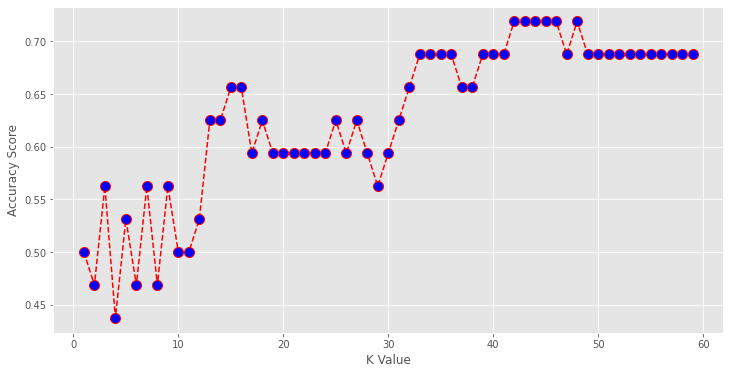

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(neighbors, score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

In [36]:
knn = KNeighborsClassifier(n_neighbors=40) #best score
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
score = accuracy_score(y_test, y_hat)
score

0.6875